In [47]:
# create and evaluate an updated autoregressive model
import pandas as pd
from pandas.tools.plotting import lag_plot,autocorrelation_plot
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [48]:
# load dataset
series = pd.read_csv(r'C:\Users\SMART\Desktop\internship\AirPollutionSeoul\original Data\Measurement_info.csv', header=0, index_col=0, parse_dates=True,squeeze=True)

In [49]:
#Filtering
df=pd.DataFrame(series)
df=df[(df['Station code'] == 101) & (df['Item code'] == 9)]
df=df.drop(['Station code','Item code','Instrument status'],axis=1)

#df.rename(columns = {'Average value':'% change'}, inplace = True) 
#df=df.pct_change()
#pd.options.mode.use_inf_as_na = True
#df=df.fillna(0)

df.head()

,Average value
Measurement date,
2017-01-01 00:00:00,57.0
2017-01-01 01:00:00,59.0
2017-01-01 02:00:00,59.0
2017-01-01 03:00:00,58.0
2017-01-01 04:00:00,61.0


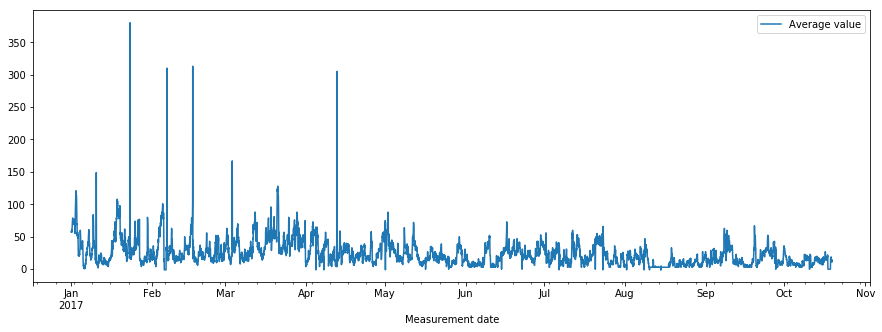

In [50]:
df.plot(figsize=(15,5))

C:\Users\SMART\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


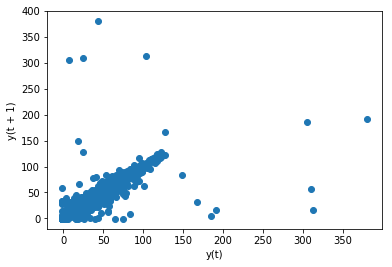

In [51]:
lag_plot(df)
#Clearly show some correlation

In [52]:
df_corr = pd.concat([df.shift(1),df],axis=1)
#df_corr.columns=['t-1','t+1']
df_corr.corr(method="pearson")

,Average value,Average value
Average value,1.000000,0.850165
Average value,0.850165,1.000000


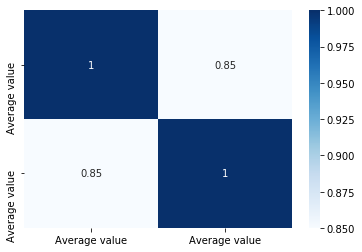

In [53]:
sns.heatmap(df_corr.corr(method="pearson"),cmap="Blues",annot=True)
#Shows strong positive Correlation

In [54]:
# split dataset

X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [55]:
# train autoregression
window = 29
model = AutoReg(train,lags=29)
model_fit = model.fit()
coef = model_fit.params

In [56]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=14.045374, expected=14.000000
predicted=14.633140, expected=14.000000
predicted=14.378917, expected=12.000000
predicted=12.986490, expected=11.000000
predicted=12.458354, expected=12.000000
predicted=12.483870, expected=12.000000
predicted=12.493749, expected=14.000000
Test RMSE: 1.348


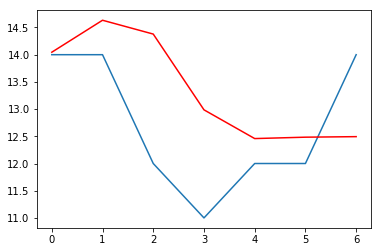

In [57]:
# plot
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()